In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from scipy import stats
plt.style.use('classic')
from matplotlib.backends.backend_pdf import PdfPages

% matplotlib inline
%load_ext autoreload
% autoreload

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/data/good data storage.csv')

In [3]:
data.loc[54]

File name                     2017050901
Age                                   25
Pip number                             2
E-I                                    1
Reci                                   0
Artifact                               0
IS100                                  1
Trial number before                   12
Trial number after                    15
Protocol                               6
Elimi                                 15
Notes                                NaN
Ptl_note               50Hz EI high freq
Name: 54, dtype: object

In [4]:
drop_index = [61, 155, 190]
for i in drop_index:
    data.drop(i, inplace=True)

In [5]:
data.columns

Index(['File name', 'Age', 'Pip number', 'E-I', 'Reci', 'Artifact', 'IS100',
       'Trial number before', 'Trial number after', 'Protocol', 'Elimi',
       'Notes', 'Ptl_note'],
      dtype='object')

In [6]:
# age_thres = 23
# data_young_uni = data[(data.Age < age_thres)&(data.Reci == 0)&(data['E-I']==1)]
# data_young_reci = data[(data.Age < age_thres)&(data.Reci == 1)&(data['E-I']==1)]
# data_old_uni = data[(data.Age >= age_thres)&(data.Reci == 0)&(data.IS100==1)&(data['E-I']==1)]
# data_old_reci = data[(data.Age >= age_thres)&(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)]
# print("data_young_uni:{},data_young_reci:{}"
#       .format(len(data_young_uni),len(data_young_reci)))
# print("data_old_uni:{},data_old_reci:{}"
#       .format(len(data_old_uni),len(data_old_reci)))

In [7]:
data_ie = data[(data['E-I'] == 0)&(data['IS100'] == 1)]
data_uni = data[(data.Reci == 0)&(data['E-I']==1)]
data_reci = data[(data.Reci == 1)&(data['E-I']==1)]
print("data_uni:{},data_reci:{}, data_ie:{}"
      .format(len(data_uni),len(data_reci), len(data_ie)))

data_uni:25,data_reci:121, data_ie:16


In [8]:
np.random.seed(123)
index = np.random.permutation(len(data_reci))[:20]
data_reci = data_reci.iloc[index]

In [9]:
# patch_pip.df_ana(data_reci, '/data/processed_reci')

In [10]:
# patch_pip.df_ana(data_uni, '/data/processed_uni')

In [11]:
# patch_pip.df_ana(data_ie, '/data/processed_ie')

In [12]:
# patch_pip.df_ana(data_young_reci, '/data/prcessed_young_reci')
# processed_old_reci = patch_pip.df_ana(data_old_reci, '/data/prcessed_old_reci')
# processed_young_reci = pd.read_pickle('/data/processed_young_reci')
processed_uni = pd.read_pickle('/data/processed_uni')
processed_reci = pd.read_pickle('/data/processed_reci')

In [13]:
processed_I_E = pd.read_pickle('/data/processed_ie')

13 14


RanksumsResult(statistic=-2.9600956749780143, pvalue=0.0030754351677022107)

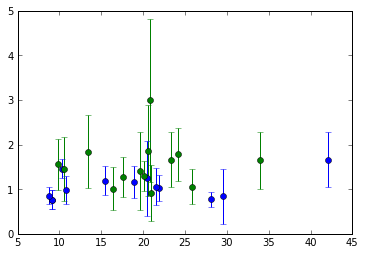

In [14]:
# Compare PPR bewteen reci and uni
processed_reci_ppr = processed_reci.copy()
processed_reci_ppr.drop(159, axis=0, inplace=True)
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['PPR']))
        ppr_uni_std.append(np.nanstd(df['PPR']))
        rs_uni.append(np.nanmean(df['rs']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci_ppr.Before.index, processed_reci.Before):
    if data_reci.loc[i]['IS100']==1:
        ppr_reci.append(np.nanmean(df['PPR']))
        ppr_reci_std.append(np.nanstd(df['PPR']))
        rs_reci.append(np.nanmean(df['rs']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni, ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci, ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

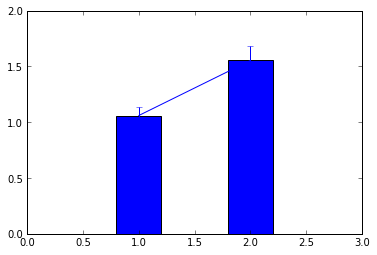

In [15]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(len(ppr_uni))
ppr_reci_mean = np.mean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci)/np.sqrt(len(ppr_reci))
plt.bar([1,2], [ppr_uni_mean, ppr_reci_mean], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean, ppr_reci_mean], [ppr_uni_ste, ppr_reci_ste])
plt.xlim([0,3])
plt.ylim([0,2])

with PdfPages('/data/figure_0_7.pdf') as pdf:
    pdf.savefig()

13 15 16


RanksumsResult(statistic=-0.71401283154256201, pvalue=0.47521924501706314)

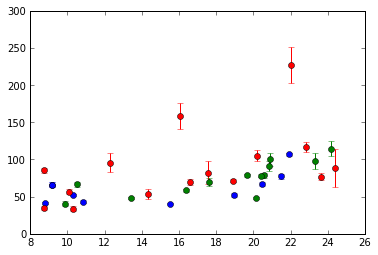

In [16]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni
def rs_corr(rin, rs):
    for i in range(len(rin)):
        if rs[i] > 25:
            rin[i] =np.nan
        # rin[i] = rin[i] - max([rs[i] - 10, 0]) * 2
    
    return rin
        
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['ir']))
        ppr_uni_std.append(np.nanstd(df['ir']))
        rs_uni.append(np.nanmean(df['rs']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    if data_reci.loc[i]['IS100']==1:
        ppr_reci.append(np.nanmean(df['ir']))
        ppr_reci_std.append(np.nanstd(df['ir']))
        rs_reci.append(np.nanmean(df['rs']))

                
ppr_ie = []
ppr_ie_std = []
rs_ie  = []
for i, df in zip(processed_I_E.Before.index, processed_I_E.Before):
    if data_ie.loc[i]['IS100']==1:
        ppr_ie.append(np.nanmean(df['ir']))
        ppr_ie_std.append(np.nanstd(df['ir']))
        rs_ie.append(np.nanmean(df['rs']))

print(len(rs_uni), len(rs_reci), len(rs_ie))
ppr_uni = rs_corr(ppr_uni, rs_uni)
ppr_reci =  rs_corr(ppr_reci, rs_reci)
ppr_ie = rs_corr(ppr_ie, rs_ie)
plt.errorbar(rs_uni, ppr_uni , ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci, ppr_reci_std, fmt='o')
plt.errorbar(rs_ie, ppr_ie, ppr_ie_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

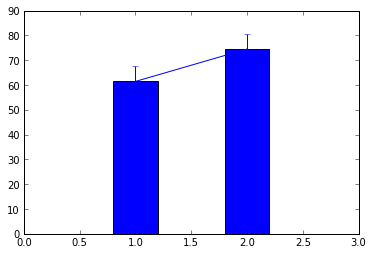

In [17]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(np.sum(~np.isnan(ppr_uni)))
ppr_reci_mean = np.nanmean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci)/np.sqrt(np.sum(~np.isnan(ppr_reci)))
plt.bar([1,2], [ppr_uni_mean, ppr_reci_mean], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean, ppr_reci_mean], [ppr_uni_ste, ppr_reci_ste])
plt.xlim([0,3])
plt.ylim([0,90])

with PdfPages('/data/figure_0_8.pdf') as pdf:
    pdf.savefig()

23 20


RanksumsResult(statistic=0.65742941730285986, pvalue=0.51090484155429028)

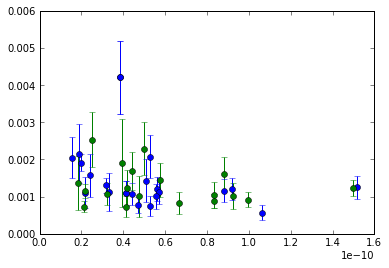

In [18]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni
processed_uni_decay = processed_uni.copy()
processed_uni_decay.drop([44, 54], axis=0, inplace=1)
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni_decay.Before.index, processed_uni.Before):
    ppr_uni.append(np.nanmean(df['raw_decay_tau']))
    ppr_uni_std.append(np.nanstd(df['raw_decay_tau']))
    rs_uni.append(np.nanmean(df['raw_amp1']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    ppr_reci.append(np.nanmean(df['raw_decay_tau']))
    ppr_reci_std.append(np.nanstd(df['raw_decay_tau']))
    rs_reci.append(np.nanmean(df['raw_amp1']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, rs_corr(ppr_uni, rs_uni), ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, rs_corr(ppr_reci, rs_reci), ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

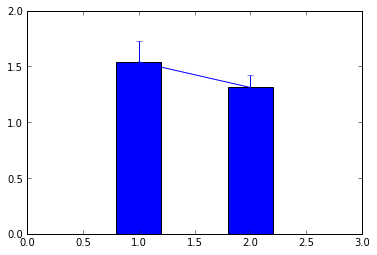

In [19]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(np.sum(~np.isnan(ppr_uni)))
ppr_reci_mean = np.nanmean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci)/np.sqrt(np.sum(~np.isnan(ppr_reci)))
plt.bar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], [ppr_uni_ste*1000, ppr_reci_ste*1000])
plt.xlim([0,3])
plt.ylim([0,2])

with PdfPages('/data/figure_0_9.pdf') as pdf:
    pdf.savefig()

13 15


RanksumsResult(statistic=0.29942473580817114, pvalue=0.7646159909706105)

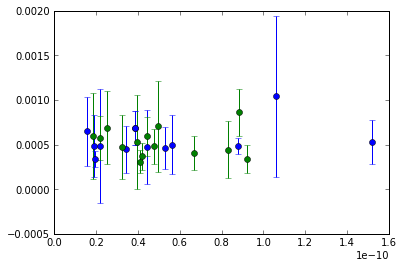

In [20]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni        
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['raw_onset_tau']))
        ppr_uni_std.append(np.nanstd(df['raw_onset_tau']))
        rs_uni.append(np.nanmean(df['raw_amp1']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    if data_reci.loc[i]['IS100']==1:
        ppr_reci.append(np.nanmean(df['raw_onset_tau']))
        ppr_reci_std.append(np.nanstd(df['raw_onset_tau']))
        rs_reci.append(np.nanmean(df['raw_amp1']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, rs_corr(ppr_uni, rs_uni), ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, rs_corr(ppr_reci, rs_reci), ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

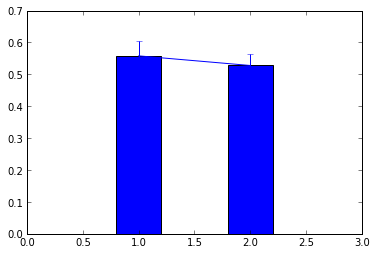

In [21]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(np.sum(~np.isnan(ppr_uni)))
ppr_reci_mean = np.nanmean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci)/np.sqrt(np.sum(~np.isnan(ppr_reci)))
plt.bar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], [ppr_uni_ste*1000, ppr_reci_ste*1000])
plt.xlim([0,3])
#plt.ylim([0,0.0008])

with PdfPages('/data/figure_0_10.pdf') as pdf:
    pdf.savefig()

In [25]:
ppr_uni

[[0.0011172341727419489,
  0.00095680610372546858,
  0.0008560463194742621,
  0.00080390731893670991,
  0.0014542335444383231,
  0.0012693060674447718,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.0013858841420091421,
  0.001140179968994771,
  nan,
  0.0019960047243992437,
  0.0015253113849089275,
  nan,
  nan,
  0.0018001548333786131],
 [0.0022369255720110473,
  nan,
  0.0034182515716352567,
  nan,
  nan,
  0.001719654628013631,
  nan,
  nan,
  0.0022240782408278138,
  0.0021512774172032022,
  0.0022440474560978482,
  0.0024168242028689041,
  0.0027078898880699576],
 [0.0028949139638658654,
  0.0028280465101899271,
  0.0036990915646237543,
  0.004037492527440208,
  0.0028227684652695787,
  nan,
  nan,
  nan,
  0.0029079087980749966,
  0.0017841063711800267,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.00228089251945088,
  0.0016401956008993434,
  nan,
  nan,
  nan,
  nan,
  0.0010922807452672357,
  nan],
 [0.0011287243180945086,
  0.0010400242847243665,
  0.001

13 15


RanksumsResult(statistic=0.99040489536548926, pvalue=0.32197625364562588)

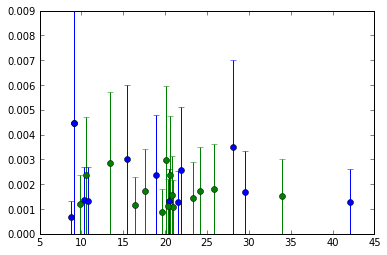

In [26]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni
def rs_corr(rin, rs):
    for i in range(len(rin)):
        rin[i] = rin[i] - max([rs[i] - 10, 0]) * 1.5
    return rin
        
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['decay_tau']))
        ppr_uni_std.append(np.nanmean(df['decay_tau']))
        rs_uni.append(np.nanmean(df['rs']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    if data_reci.loc[i]['IS100']==1:
        ppr_reci.append(np.nanmean(df['decay_tau']))
        ppr_reci_std.append(np.nanmean(df['decay_tau']))
        rs_reci.append(np.nanmean(df['rs']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni, ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci, ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3deffefb38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3deff77ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3deff83e48>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3deff7df60>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3deffefda0>,
  <matplotlib.lines.Line2D at 0x7f3deff87fd0>]}

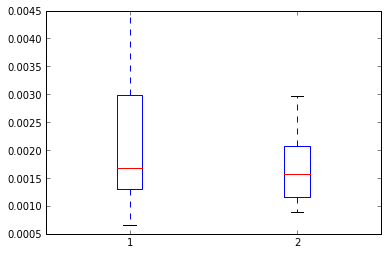

In [27]:
plt.boxplot([ppr_uni, ppr_reci], 0, 'gD')

In [29]:
# processed_old_reci = patch_pip.df_ana(data_uni, '/data/prcessed_old_reci')
# processed_young_reci = pd.read_pickle('/data/processed_young_reci')
# processed_reci = pd.concat([processed_old_reci, processed_young_reci], axis=0)
# # Compare PPR bewteen old reci and old uni
# ppr_old_uni = []
# ppr_old_uni_std = []
# rs_old_uni = []
# for i in processed_old_uni.Before:
#     ppr_old_uni.append(np.nanmean(i['PPR']))
#     ppr_old_uni_std.append(np.nanstd(i['PPR']))
#     rs_old_uni.append(np.nanmean(i['ave_amp1']))
    
# # ppr_old_reci = []
# # ppr_ord_reci_std = []
# # rs_old_reci = []
# # for i in processed_reci.Before:
# #     ppr_old_reci.append(np.nanmean(i['PPR']))
# #     ppr_ord_reci_std.append(np.nanstd(i['PPR']))
# #     rs_old_reci.append(np.nanmean(i['ave_amp1']))
    
# # plt.errorbar(rs_old_uni, ppr_old_uni, ppr_old_uni_std, fmt='o')
# # plt.errorbar(rs_old_reci, ppr_old_reci, ppr_ord_reci_std, fmt='o')
# # stats.ttest_ind(ppr_old_uni, ppr_old_reci)
# # #plt.xlim([7,30])
# # # plt.ylim([10, 150])

In [30]:
data_E_I = data[(data['E-I']==1)]
data_I_E = data[(data['E-I']==0)]
print("data_E_I:{},data_I_E:{}"
      .format(len(data_E_I),len(data_I_E)))

data_E_I:146,data_I_E:39


In [31]:
data_E_I.iloc[0]

File name                   2016081002
Age                                 27
Pip number                           1
E-I                                  1
Reci                                 0
Artifact                             0
IS100                                0
Trial number before                  1
Trial number after               4,5,6
Protocol                             2
Elimi                                0
Notes                              NaN
Ptl_note               50Hz EI preonly
Name: 9, dtype: object

In [32]:
# for i in range(5):
#     patch_pip.df_ana(data_E_I.iloc[i*20:(i+1)*20], '/data/processed_E_I_'+str(i))

In [33]:
#patch_pip.df_ana(data_E_I, '/data/processed_E_I')
#patch_pip.df_ana(data_I_E, '/data/processed_I_E')
processed_E_I = pd.read_pickle('/data/processed_E_I_1')
processed_I_E = pd.read_pickle('/data/processed_I_E')

FileNotFoundError: [Errno 2] No such file or directory: '/data/processed_E_I_1'

In [34]:
# Input resistance
rin_EI = []
rs_EI = []
for i in processed_E_I.Before:
    rin_EI.append(np.nanmean(i['ir']))
    rs_EI.append(np.nanmean(i['rs']))
    
rin_IE= []
rs_IE = []
for i in processed_I_E.Before:
    rin_IE.append(np.nanmean(i['ir']))
    rs_IE.append(np.nanmean(i['rs']))
    
plt.plot(rs_EI, rin_EI, 'b.')
plt.plot(rs_IE, rin_IE, 'r.')
#plt.xlim([7,30])
#plt.ylim([10, 150])

NameError: name 'processed_E_I' is not defined

In [ ]:
len(rs_IE)

In [ ]:
# for j in processed_old_uni.Before.index:
#     for i in range(len(processed_old_uni.Before.loc[j]['trace_y1'])):
#         plt.figure()
#         plt.plot(processed_old_uni.Before.loc[j]['trace_y1'][i])
#         plt.plot(processed_old_uni.Before.loc[j]['trace_y2'][i])
#         plt.title('index{a}:'.format(a=j)+ str(processed_old_uni.Before.loc[j]['PPR'][i]))

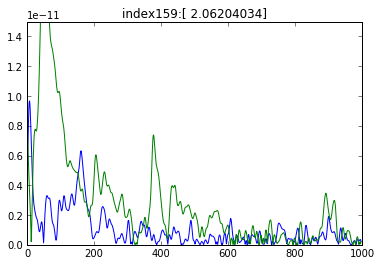

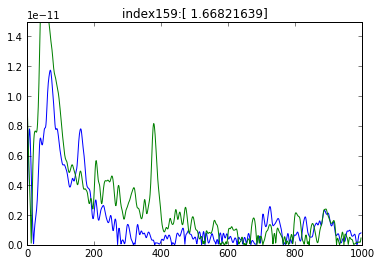

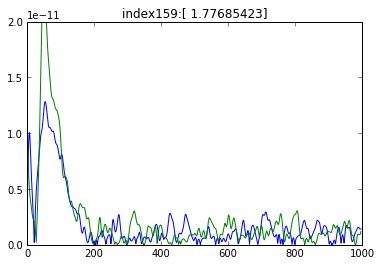

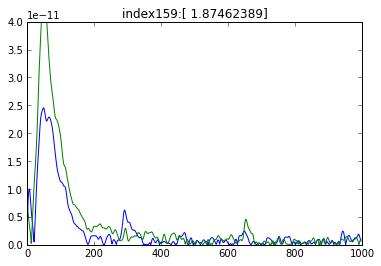

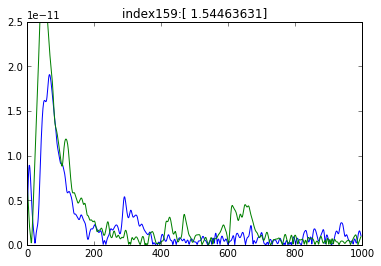

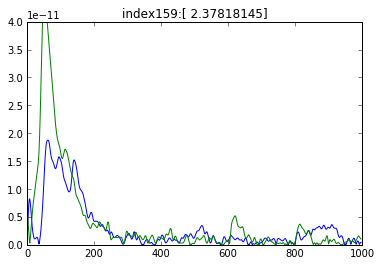

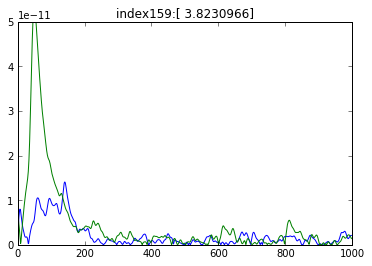

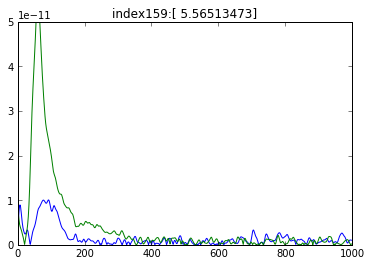

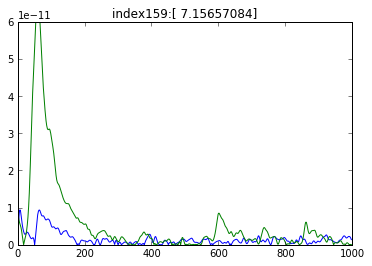

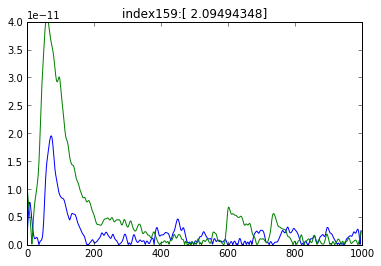

In [35]:
for j in [159]:
    for i in range(len(processed_reci.Before.loc[j]['trace_y1'])):
        plt.figure()
        plt.plot(processed_reci.Before.loc[j]['trace_y1'][i])
        plt.plot(processed_reci.Before.loc[j]['trace_y2'][i])
        plt.title('index{a}:'.format(a=j)+ str(processed_reci.Before.loc[j]['PPR'][i]))

In [36]:
data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)]
len(data_reci_all)

age_list = []
PPR_list = []
Rin_list = []
Rs_list = []
data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][:30]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][31:60]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][61:90]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][91:102]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

df_age_PPR = pd.DataFrame(data=np.vstack([age_list, PPR_list,Rin_list, Rs_list]).transpose(), columns=['age', 'PPR', 'rin', 'rs'])

KeyboardInterrupt: 

In [ ]:
# df_age_PPR.to_csv('/data/age_PPR_reci_rin_rs')
df_age_PPR = pd.read_csv('/data/age_PPR_reci_rin_rs')
df_age_PPR.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_age_PPR.head()

In [ ]:
# Dependence of PPR on age
plt.plot(df_age_PPR.age, df_age_PPR.PPR, '.')

In [ ]:
import scipy

In [ ]:
stats.ttest_ind(ppr_old_uni, ppr_old_reci)

In [ ]:
processed_young_uni = patch_pip.df_ana(data_young_uni, 'prcessed_young_uni', if_save=False)
# processed_young_reci = patch_pip.df_ana(data_young_reci, 'prcessed_young_reci', if_save=False)

In [ ]:
for i, trial in enumerate(processed_young_uni.Before):
    plt.plot(trial['trace_rin']-np.mean(trial['trace_rin'][:1000]), label=processed_young_uni.Before.index[i])

plt.legend()

In [ ]:
data_young_uni

In [ ]:
for df in processed_young_uni.Before:
    plt.plot(df['trace_rin'])

In [ ]:
processed_young_uni.Before

In [ ]:
patch_pip.df_ana(sample_data,'sample_data')
processed_sample_data = pd.read_pickle('sample_data')

In [ ]:
processed_sample_data.Before.iloc[0].keys()

In [ ]:
prcessed_test = processed_sample_data.Before.iloc[0]
resp1 = np.vstack(prcessed_test['trace_y1'])

In [ ]:
prcessed_test['raw_decay_tau']

In [ ]:
prcessed_test['ir']

In [ ]:
prcessed_test['raw_decay_tau'].shape

In [ ]:
len(prcessed_test['decay_tau'])

In [ ]:
prcessed_test['raw_onset_tau']

In [ ]:
plt.plot(resp1.mean(axis=0))

In [ ]:
plt.plot(prcessed_test['trace_y1'])

In [ ]:
# Write function to analyze input resistance and firing property of each cell


In [ ]:
# Write function to analyze synaptic property, paired pulse ratio, onset decay time constant

In [ ]:
# Group based on age